# Marketing Campaign For Banking Products

## Description: The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank(mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Data: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

#### Importing the Required Packages

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import seaborn as sns

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### The data set is given in XLSX format so I've Converted it into CSV format and importing it to the notebook

In [51]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [52]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [53]:
data.sample()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
258,259,35,9,24,95747,4,0.3,1,0,0,0,0,1,0


#### No of Rows and Columns in the Given Data Set

In [54]:
print('Rows:     ', data.shape[0])
print('Columns:  ',data.shape[1])

Rows:      5000
Columns:   14


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [56]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Replacing Negative Values in Experience by the columns Median

In [57]:
for x in data['Experience']:
    if x<0:
        data['Experience'].replace(to_replace=x, value=data['Experience'].median(), inplace=True, limit=None, regex=False, method='pad')

In [58]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Splitting the columns into categorical and continuous variables.

In [59]:
cat = data[['Securities Account', 'CD Account','Personal Loan', 'Online', 'Family','CreditCard','Education']]
con = data[['Age', 'Mortgage','Income','CCAvg','Experience', 'ZIP Code']]

#### Finding Unique Values in Each Column


In [60]:
data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### Count of People with Zero Mortagage Values

In [61]:
print(data['Mortgage'].value_counts()[0])

3462


#### Number of people with zero credit card spending per month.


In [62]:
print(data['CCAvg'].value_counts()[0])

106


#### Count of All Categorical Values

In [63]:
for x in cat:
    print(x,':')
    print(cat[x].value_counts())
    print()

Securities Account :
0    4478
1     522
Name: Securities Account, dtype: int64

CD Account :
0    4698
1     302
Name: CD Account, dtype: int64

Personal Loan :
0    4520
1     480
Name: Personal Loan, dtype: int64

Online :
1    2984
0    2016
Name: Online, dtype: int64

Family :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

CreditCard :
0    3530
1    1470
Name: CreditCard, dtype: int64

Education :
1    2096
3    1501
2    1403
Name: Education, dtype: int64



#### Univariate analysis of Categorical Values aka Variables.

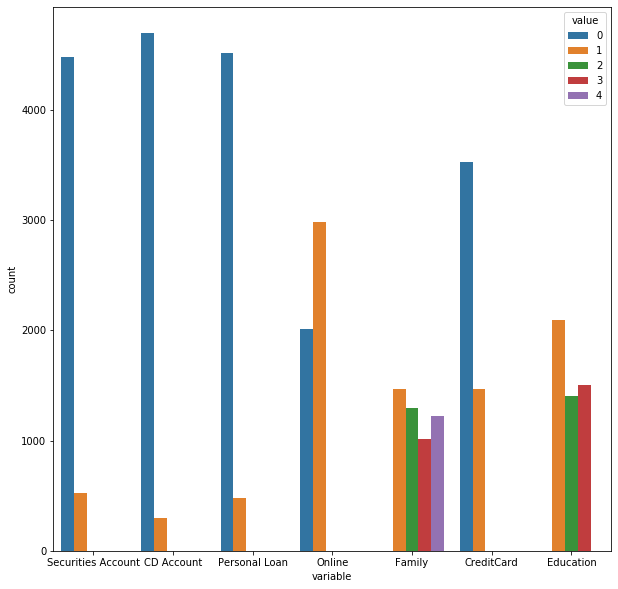

In [64]:
dframe = pd.melt(cat)
figure(figsize=(10,10))
sns.countplot(data = dframe, x='variable', hue='value')

####  Univariate Analysis of Continuous Variables

Age              AxesSubplot(0.125,0.536818;0.227941x0.343182)
Mortgage      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Income        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
CCAvg               AxesSubplot(0.125,0.125;0.227941x0.343182)
Experience       AxesSubplot(0.398529,0.125;0.227941x0.343182)
ZIP Code         AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

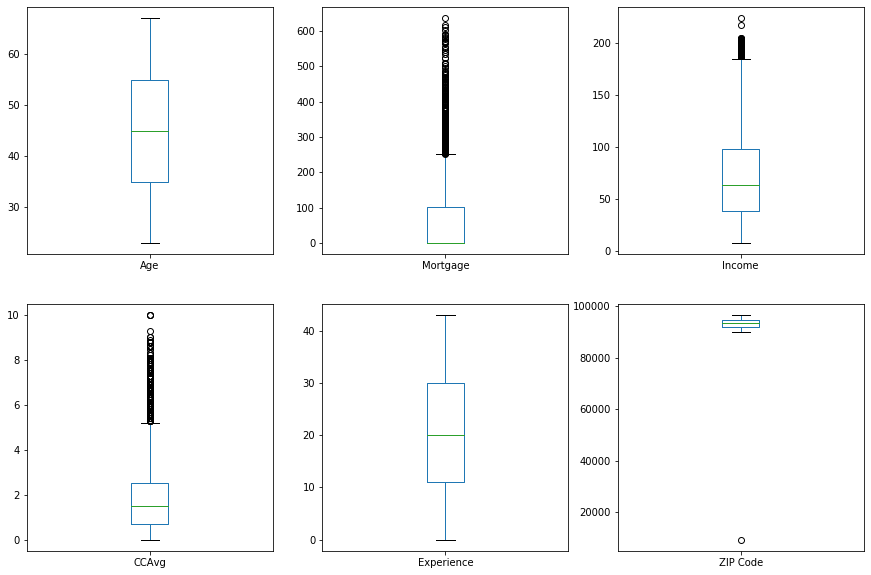

In [65]:
con.plot.box(subplots=True, layout = (2,3), figsize=(15,10))

#### Bivariate analysis of continuous variables.


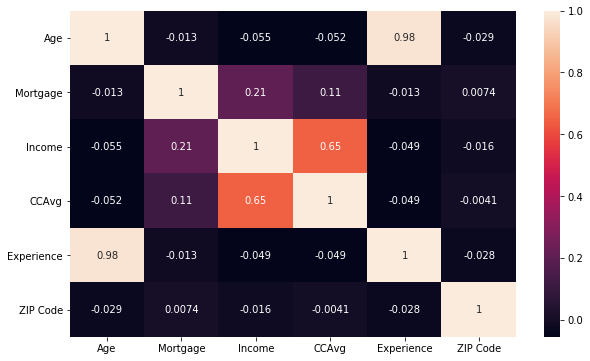

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(con.corr(), annot=True)

#### Target variable relation with continuous variables.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


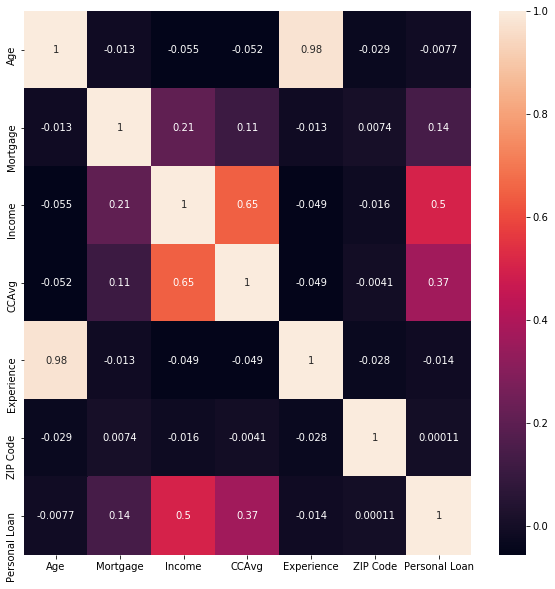

In [67]:
cont_temp = con
cont_temp['Personal Loan'] = data['Personal Loan']
figure(figsize=(10,10))
sns.heatmap(cont_temp.corr(), annot=True)

#### Target variable relation with categorical variables.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


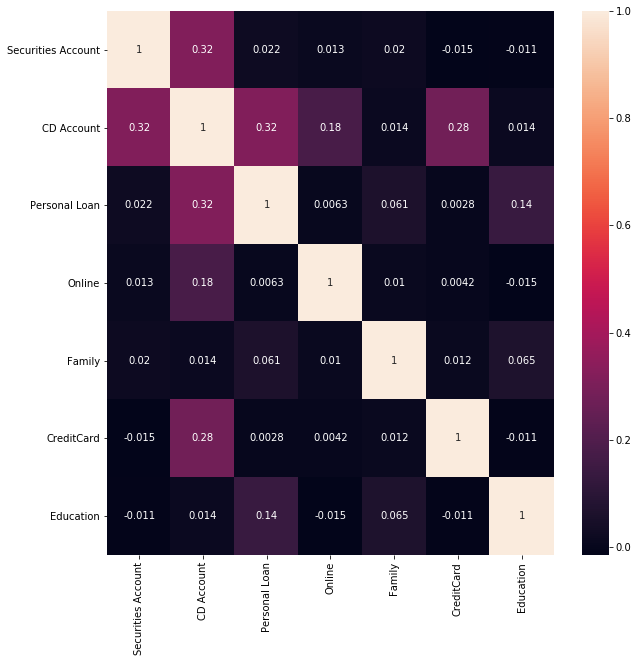

In [68]:
cat_temp = cat
cat_temp['Personal Loan'] = data['Personal Loan']
figure(figsize=(10,10))
sns.heatmap(cat_temp.corr(), annot=True)

#### Dropping columns that are not useful

In [69]:
data_modified = data.drop(['ID', 'Experience', 'ZIP Code', 'Securities Account', 'Online', 'CreditCard', 'Family'], axis=1)

#### Applying transformation to skewed data.



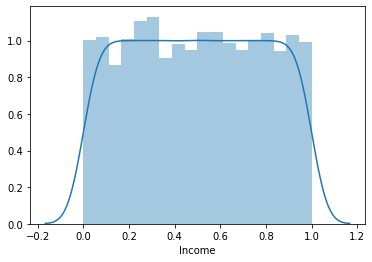

In [70]:
scaler = QuantileTransformer( )
scaler.fit(data_modified['Income'].values.reshape(-1,1))
data_modified['Income'] = scaler.fit_transform(data_modified['Income'].values.reshape(-1,1))
sns.distplot(data_modified['Income'])

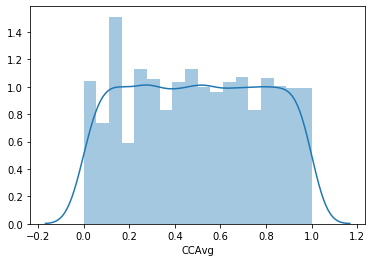

In [71]:
scaler = QuantileTransformer()
scaler.fit(data_modified['CCAvg'].values.reshape(-1,1))
data_modified['CCAvg'] = scaler.fit_transform(data_modified['CCAvg'].values.reshape(-1,1))
sns.distplot(data_modified['CCAvg'])

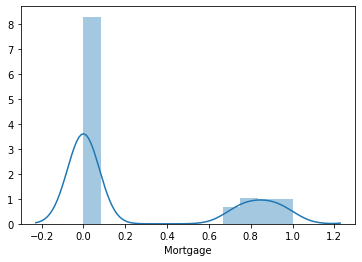

In [72]:
scaler = QuantileTransformer()
scaler.fit(data_modified['Mortgage'].values.reshape(-1,1))
data_modified['Mortgage'] = scaler.fit_transform(data_modified['Mortgage'].values.reshape(-1,1))
sns.distplot(data_modified['Mortgage'])

#### Building a logistic regression model.



In [73]:
X = data_modified.drop(['Personal Loan'],axis=1)
y = data_modified['Personal Loan']

#### Splitting the dataset into training and test sets as a stratified sample

In [74]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 6), (1500, 6), (3500,), (1500,))

#### Fitting the model.



In [75]:
logistic_regression= LogisticRegression(random_state=2)
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction and Performance on Test Data.



In [76]:
from sklearn.metrics import confusion_matrix
y_pred_test=logistic_regression.predict(X_test)
print('Predicted values using test data:',y_pred_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
cm = confusion_matrix(y_pred_test,y_test)
print(cm)

Predicted values using test data: [0 0 0 ... 0 0 0]
Accuracy:  0.9526666666666667
[[1349   64]
 [   7   80]]


#### Prediction and Performance on Train Data.


In [77]:
from sklearn.metrics import confusion_matrix
y_pred_train = logistic_regression.predict(X_train)
print('Predicted values using train data:',y_pred_train)
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_pred_train, y_train)
print(cm)

Predicted values using train data: [0 0 0 ... 0 0 0]
Accuracy:  0.9551428571428572
[[3146  139]
 [  18  197]]


In [78]:
print("Classification Report: \n",metrics.classification_report(y_pred_test, y_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1413
           1       0.56      0.92      0.69        87

    accuracy                           0.95      1500
   macro avg       0.78      0.94      0.83      1500
weighted avg       0.97      0.95      0.96      1500



In [79]:
print("Classification Report: \n",metrics.classification_report(y_pred_train, y_train))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      3285
           1       0.59      0.92      0.72       215

    accuracy                           0.96      3500
   macro avg       0.79      0.94      0.85      3500
weighted avg       0.97      0.96      0.96      3500



#### Building a random forest classifier model.
#### Creating a decision tree object.

In [80]:
model=RandomForestClassifier(n_estimators=100,random_state=50)

#### Train the model using the training sets.

In [81]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

#### Predicting the target variable values and printing performance summary for test data.

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_test=model.predict(X_test)                     
print('Predicted values using test data:',y_pred_test)
print("Accuracy: ", metrics.accuracy_score(y_pred_test,y_test))
cm = confusion_matrix(y_pred_test,y_test)
print(cm,'\n')
print("Classification Report: \n",metrics.classification_report(y_pred_test, y_test))

Predicted values using test data: [1 0 0 ... 0 0 0]
Accuracy:  0.97
[[1349   38]
 [   7  106]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1387
           1       0.74      0.94      0.82       113

    accuracy                           0.97      1500
   macro avg       0.87      0.96      0.90      1500
weighted avg       0.98      0.97      0.97      1500



#### Predicting the target variable values and printing performance summary for train data.

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_train=model.predict(X_train)                     
print('Predicted values using train data:',y_pred_train)
print("Accuracy: ", metrics.accuracy_score(y_pred_train,y_train))
cm = confusion_matrix(y_pred_train,y_train)
print(cm,'\n')
print("Classification Report: \n",metrics.classification_report(y_pred_train, y_train))

Predicted values using train data: [0 0 0 ... 0 0 0]
Accuracy:  1.0
[[3164    0]
 [   0  336]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

